In [1]:
!git clone https://github.com/microsoft/OmniParser.git

Cloning into 'OmniParser'...
remote: Enumerating objects: 1037, done.
remote: Counting objects: 100% (305/305), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 1037 (delta 221), reused 143 (delta 143), pack-reused 732 (from 2)
Receiving objects: 100% (1037/1037), 50.57 MiB | 13.48 MiB/s, done.
Resolving deltas: 100% (536/536), done.


In [2]:
!cd OmniParser

%cd OmniParser

/content/OmniParser


In [3]:
%%writefile requirements.txt
torch
easyocr
torchvision
supervision==0.18.0
openai==1.3.5
transformers==4.51.3
ultralytics==8.3.70
azure-identity
numpy==2.0.0
opencv-python
opencv-python-headless
gradio
dill
accelerate
timm
einops==0.8.0
paddlepaddle
paddleocr
ruff==0.6.7
pre-commit==3.8.0
pytest==8.3.3
pytest-asyncio==0.23.6
pyautogui==0.9.54
streamlit>=1.38.0
anthropic[bedrock,vertex]>=0.37.1
jsonschema==4.22.0
boto3>=1.28.57
google-auth<3,>=2
screeninfo
uiautomation
dashscope
groq
huggingface_hub
thinc==8.3.6

Overwriting requirements.txt


In [4]:

!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
# !pip uninstall numpy
# !pip install numpy==2.0.0

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 35.8 MB/s eta 0:00:00


In [6]:
# !pip install thinc==8.3.6

In [7]:
# !pip install transformers==4.51.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.4
    Uninstalling transformers-4.52.4:
      Successfully uninstalled transformers-4.52.4


In [9]:
!cd OmniParser

%cd OmniParser

/bin/bash: line 1: cd: OmniParser: No such file or directory
[Errno 2] No such file or directory: 'OmniParser'
/content/OmniParser


In [2]:
%%bash
# make sure we're in the right dir
cd /content/OmniParser

# ensure weights/ exists
mkdir -p weights

# loop over each checkpoint file and download it
for f in \
  icon_detect/train_args.yaml \
  icon_detect/model.pt \
  icon_detect/model.yaml \
  icon_caption/config.json \
  icon_caption/generation_config.json \
  icon_caption/model.safetensors
do
  huggingface-cli download microsoft/OmniParser-v2.0 \
    "$f" --local-dir weights
done

# rename the caption folder to what the code expects
mv weights/icon_caption weights/icon_caption_florence


weights/icon_detect/train_args.yaml
weights/icon_detect/model.pt
weights/icon_detect/model.yaml
weights/icon_caption/config.json
weights/icon_caption/generation_config.json
weights/icon_caption/model.safetensors


Download complete. Moving file to weights/icon_detect/train_args.yaml
Download complete. Moving file to weights/icon_detect/model.pt
Download complete. Moving file to weights/icon_detect/model.yaml
Download complete. Moving file to weights/icon_caption/config.json
Download complete. Moving file to weights/icon_caption/generation_config.json
Download complete. Moving file to weights/icon_caption/model.safetensors


In [29]:
# !pip install -q gradio==5.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 11.3 MB/s eta 0:00:00


In [10]:
import torch
from util.utils import get_yolo_model

# pick device
device = torch.device("cuda" if torch.cuda.is_available()
                      else "mps"   if torch.backends.mps.is_available()
                      else "cpu")
print("Using device:", device)

# load the model
som_model = get_yolo_model("weights/icon_detect/model.pt")

#  ────────────────────────────────────────────────────────────────
# **The key fix: force *all* layers back to float32 before moving to device**
som_model.model = som_model.model.float()    # convert entire nn.Sequential to fp32
som_model = som_model.to(device)              # now safe to send to device
# ────────────────────────────────────────────────────────────────

print("Model dtype after .float():", next(som_model.model.parameters()).dtype)


Using device: cuda
Model dtype after .float(): torch.float32


In [11]:
import torch

def to_fp32(module: torch.nn.Module):
    # cast parameters and buffers
    for name, param in list(module._parameters.items()):
        if param is not None:
            module._parameters[name] = param.float()
    for name, buf in list(module._buffers.items()):
        if buf is not None:
            module._buffers[name] = buf.float()
    # recurse
    for child in module.children():
        to_fp32(child)
    return module

# load your model
som_model = get_yolo_model("weights/icon_detect/model.pt")

# force entire detector back to float32
som_model.model = to_fp32(som_model.model).to(device)

# sanity check
print("After conversion:", next(som_model.model.parameters()).dtype)  # should be torch.float32


After conversion: torch.float32


In [12]:
# two choices for caption model: fine-tuned blip2 or florence2
import importlib
# import util.utils
# importlib.reload(utils)
from util.utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
caption_model_processor = get_caption_model_processor(model_name="florence2", model_name_or_path="weights/icon_caption_florence", device=device)

In [13]:
torch.backends.mkldnn.enabled = False


In [8]:
!pwd

/content/OmniParser


In [14]:
# reload utils
import importlib
import utils
importlib.reload(utils)
from PIL import Image
from util.utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model

image_path = 'imgs/google_page.png'
image_path = 'imgs/windows_home.png'
# image_path = 'imgs/windows_multitab.png'
# image_path = 'imgs/omni3.jpg'
# image_path = 'imgs/ios.png'
image_path = 'imgs/word.png'
# image_path = 'imgs/excel2.png'
def image_annotation(image_path):
  image = Image.open(image_path)
  image_rgb = image.convert('RGB')
  print('image size:', image.size)

  box_overlay_ratio = max(image.size) / 3200
  draw_bbox_config = {
      'text_scale': 0.8 * box_overlay_ratio,
      'text_thickness': max(int(2 * box_overlay_ratio), 1),
      'text_padding': max(int(3 * box_overlay_ratio), 1),
      'thickness': max(int(3 * box_overlay_ratio), 1),
  }
  BOX_TRESHOLD = 0.05

  import time
  start = time.time()
  ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9}, use_paddleocr=True)
  text, ocr_bbox = ocr_bbox_rslt
  cur_time_ocr = time.time()
  dino_labeled_img, label_coordinates, parsed_content_list = get_som_labeled_img(
      image_path,
      som_model,
      BOX_TRESHOLD=BOX_TRESHOLD,
      output_coord_in_ratio=True,
      ocr_bbox=ocr_bbox,
      draw_bbox_config=draw_bbox_config,
      caption_model_processor=caption_model_processor,
      ocr_text=text,
      use_local_semantics=True,
      iou_threshold=0.7,
      scale_img=False,
      batch_size=128
  )
  cur_time_caption = time.time()
  return dino_labeled_img, parsed_content_list


In [12]:
# o1, o2 =image_annotation("/content/screenshots/booking-dataset/Screenshot 2025-06-12 at 14.19.11-Step0.png")

image size: (3024, 1964)

0: 832x1280 62 icons, 85.9ms
Speed: 14.0ms preprocess, 85.9ms inference, 2.1ms postprocess per image at shape (1, 3, 832, 1280)
len(filtered_boxes): 70 14
time to get parsed content: 0.4523007869720459


In [15]:
import json
import re
import base64
import io
import gc
from pathlib import Path
from typing import List, Dict, Optional

import torch
from PIL import Image

# Ensure `image_annotation`, `som_model`, `caption_model_processor`, etc. are
# already defined in the notebook before importing this helper.


###############################################################################
# Utility helpers
###############################################################################

def _decode_base64_to_pil(img_str: str) -> Image.Image:
    """Convert a base64‐encoded PNG/JPEG string to a PIL Image."""
    if "," in img_str:  # strip any data‑URI prefix
        img_str = img_str.split(",", 1)[-1]
    img_bytes = base64.b64decode(img_str)
    return Image.open(io.BytesIO(img_bytes))


def _load_existing_annotations(json_path: Path) -> List[Dict]:
    """Load an existing JSON file (if present) and return its records list."""
    if json_path.is_file():
        try:
            with open(json_path, "r", encoding="utf-8") as fp:
                return json.load(fp)
        except Exception as err:
            print(f"⚠️  Could not read existing JSON ({json_path}): {err}. Starting fresh.")
    return []


###############################################################################
# Main driver
###############################################################################

def process_booking_dataset(
    base_dir: Path | None = None,
    output_json: str = "booking_dataset_annotations.json",
    flush_every: int = 5,
    start_step: Optional[int] = None,
    end_step: Optional[int] = None,
) -> None:
    """Annotate Booking screenshots and maintain a crash‑safe JSON index.

    Parameters
    ----------
    base_dir : Path | None
        Root folder that holds the raw screenshots. If *None*, the function
        assumes the working directory is `/content/OmniParser` and walks up one
        level to `screenshots/booking-dataset`.
    output_json : str, default ``booking_dataset_annotations.json``
        JSON file name created **inside ``base_dir``** to store annotation
        records.
    flush_every : int, default 5
        After every *flush_every* screenshots the GPU/CPU caches are purged via
        ``torch.cuda.empty_cache()`` + ``gc.collect()`` to avoid OOM.
    start_step : int | None, default *None*
        Lowest step number to process (inclusive). ``None`` means start from the
        first available screenshot.
    end_step : int | None, default *None*
        Highest step number to process (inclusive). ``None`` means run until the
        last available screenshot.
    """

    # ---------------------------------------------------------------------
    # Locate dataset directory
    # ---------------------------------------------------------------------
    if base_dir is None:
        base_dir = (Path.cwd() / ".." / "screenshots" / "booking-dataset").resolve()

    if not base_dir.is_dir():
        raise FileNotFoundError(f"Dataset directory not found: {base_dir}")

    dataset_name = base_dir.name  # e.g. "booking-dataset"
    annotated_dir = base_dir / "annotated"
    annotated_dir.mkdir(exist_ok=True)

    # ---------------------------------------------------------------------
    # Collect and filter screenshot filenames
    # ---------------------------------------------------------------------
    step_regex = re.compile(r"steps?(\d+)", re.IGNORECASE)
    all_steps: List[tuple[int, Path]] = [
        (int(m.group(1)), p)
        for p in base_dir.glob("*.png")
        if (m := step_regex.search(p.stem))
    ]
    all_steps.sort(key=lambda t: t[0])

    # Apply range filter
    step_files = [
        (n, p)
        for n, p in all_steps
        if (start_step is None or n >= start_step)
        and (end_step is None or n <= end_step)
    ]

    if not step_files:
        rng = f"{start_step}–{end_step}" if start_step or end_step else "<any>"
        print(f"⚠️  No PNG screenshots with 'step' in the selected range ({rng}). Nothing to do.")
        return

    # ---------------------------------------------------------------------
    # Prepare existing JSON records (if any)
    # ---------------------------------------------------------------------
    json_path = base_dir / output_json
    annotations: List[Dict] = _load_existing_annotations(json_path)
    # Use dict for quick overwrite / de‑duplication
    ann_by_fname = {rec["img_filename"]: rec for rec in annotations}

    # ---------------------------------------------------------------------
    # Main processing loop
    # ---------------------------------------------------------------------
    for idx, (step_num, img_path) in enumerate(step_files):
        print(f"[step {step_num:02d}] → {img_path.name}")
        try:
            with torch.inference_mode():
                annotated_img, parsed_content = image_annotation(str(img_path))
        except Exception as exc:
            print(f"  ⚠️  Skipping {img_path.name}: {exc}")
            continue

        annotated_filename = f"annotated_{dataset_name}_step{step_num}.png"
        annotated_path = annotated_dir / annotated_filename

        # ---------------- Save annotated image -------------------------
        try:
            if isinstance(annotated_img, Image.Image):
                annotated_img.save(annotated_path)
            elif isinstance(annotated_img, (bytes, bytearray)):
                Image.open(io.BytesIO(annotated_img)).save(annotated_path)
            elif isinstance(annotated_img, str):
                _decode_base64_to_pil(annotated_img).save(annotated_path)
            else:
                import numpy as np
                if isinstance(annotated_img, np.ndarray):
                    Image.fromarray(annotated_img).save(annotated_path)
                else:
                    raise TypeError(f"Unsupported annotated_img type: {type(annotated_img)}")
        except Exception as save_err:
            print(f"  ⚠️  Could not save annotated image for {img_path.name}: {save_err}")
            continue

        # ---------------- Append / overwrite JSON record --------------
        record = {
            "img_filename": img_path.name,
            "annotated_img_filename": annotated_filename,
            "annotations": parsed_content,
        }
        ann_by_fname[img_path.name] = record
        annotations = sorted(ann_by_fname.values(), key=lambda r: r["img_filename"])  # stable order

        # Crash‑safe write after every image
        try:
            with open(json_path, "w", encoding="utf-8") as fp:
                json.dump(annotations, fp, ensure_ascii=False, indent=2)
        except Exception as json_err:
            print(f"  ⚠️  Failed to write JSON after {img_path.name}: {json_err}")

        # ---------------- Memory hygiene ------------------------------
        del annotated_img, parsed_content, record
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        if (idx + 1) % flush_every == 0:
            print(f"🧹  Flushed caches after {idx + 1} screenshots — continuing…")

    # ---------------------------------------------------------------------
    print(
        f"✅ Finished. {len(annotations)} screenshots now indexed in '{json_path.name}'. Images → '{annotated_dir.name}'"
    )





In [16]:
process_booking_dataset(flush_every=5, start_step=18, end_step=19)

[step 18] → Screenshot 2025-06-12 at 14.29.04-step18.png
image size: (3024, 1964)

0: 832x1280 65 icons, 89.9ms
Speed: 8.4ms preprocess, 89.9ms inference, 1.7ms postprocess per image at shape (1, 3, 832, 1280)
len(filtered_boxes): 91 53
time to get parsed content: 0.27530479431152344
[step 19] → Screenshot 2025-06-12 at 14.29.28-step19.png
image size: (3024, 1964)

0: 832x1280 69 icons, 86.1ms
Speed: 7.9ms preprocess, 86.1ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 1280)
len(filtered_boxes): 109 65
time to get parsed content: 0.26114344596862793
✅ Finished. 20 screenshots now indexed in 'booking_dataset_annotations.json'. Images → 'annotated'


In [46]:
o1, o2 =image_annotation(image_path)

image size: (1919, 1079)

0: 736x1280 115 icons, 74.1ms
Speed: 9.6ms preprocess, 74.1ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 128 41
time to get parsed content: 0.5818352699279785


In [54]:
!pip install -q --upgrade "gradio>=4.33.2"

In [10]:
import gradio as gr, io, base64, tempfile, traceback
from PIL import Image

def annotate_pil(pil_img: Image.Image):
    try:
        # 1️⃣ save upload to a temp file
        with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
            pil_img.save(tmp.name)
            path = tmp.name

        # 2️⃣ run your existing logic
        b64_img, parsed_list = image_annotation(path)

        # 3️⃣ base64 → PIL
        annotated = Image.open(io.BytesIO(base64.b64decode(b64_img)))

        # 4️⃣ pretty-print parsed list
        parsed_text = "\n".join(map(str, parsed_list))

        return annotated, parsed_text

    except Exception as e:
        # optional: log full stack trace in notebook
        traceback.print_exc()

        # show clean message to user / API caller
        raise gr.Error(f"Failed to process image: {e}")

        # — or, if you prefer not to raise —
        # return None, f"ERROR: {e}"
        # (make outputs accept None by adding `gr.Image(type="pil", label="Annotated", value=None)`)

# ---- UI ----
demo = gr.Interface(
    fn=annotate_pil,
    inputs=gr.Image(type="pil", label="Upload an image"),
    outputs=[
        gr.Image(type="pil", label="Annotated image"),
        gr.Textbox(label="parsed_content_list"),
    ],
    title="Simple Image-Annotation Demo",
)

demo.launch(share=True, debug=False)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://155be15d730ed00a50.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


[{'type': 'text', 'bbox': [0.06679894030094147, 0.0096741346642375, 0.0863095223903656, 0.028004072606563568], 'interactivity': False, 'content': 'File', 'source': 'box_ocr_content_ocr'}, {'type': 'text', 'bbox': [0.09788359701633453, 0.0096741346642375, 0.11772486567497253, 0.028004072606563568], 'interactivity': False, 'content': 'Edit', 'source': 'box_ocr_content_ocr'}, {'type': 'text', 'bbox': [0.1259920597076416, 0.0096741346642375, 0.1488095223903656, 0.028004072606563568], 'interactivity': False, 'content': 'View', 'source': 'box_ocr_content_ocr'}, {'type': 'text', 'bbox': [0.15939153730869293, 0.0096741346642375, 0.17824074625968933, 0.028004072606563568], 'interactivity': False, 'content': 'Tab', 'source': 'box_ocr_content_ocr'}, {'type': 'text', 'bbox': [0.1875, 0.0096741346642375, 0.21759259700775146, 0.028004072606563568], 'interactivity': False, 'content': 'Blockse', 'source': 'box_ocr_content_ocr'}, {'type': 'text', 'bbox': [0.28439152240753174, 0.0096741346642375, 0.3197

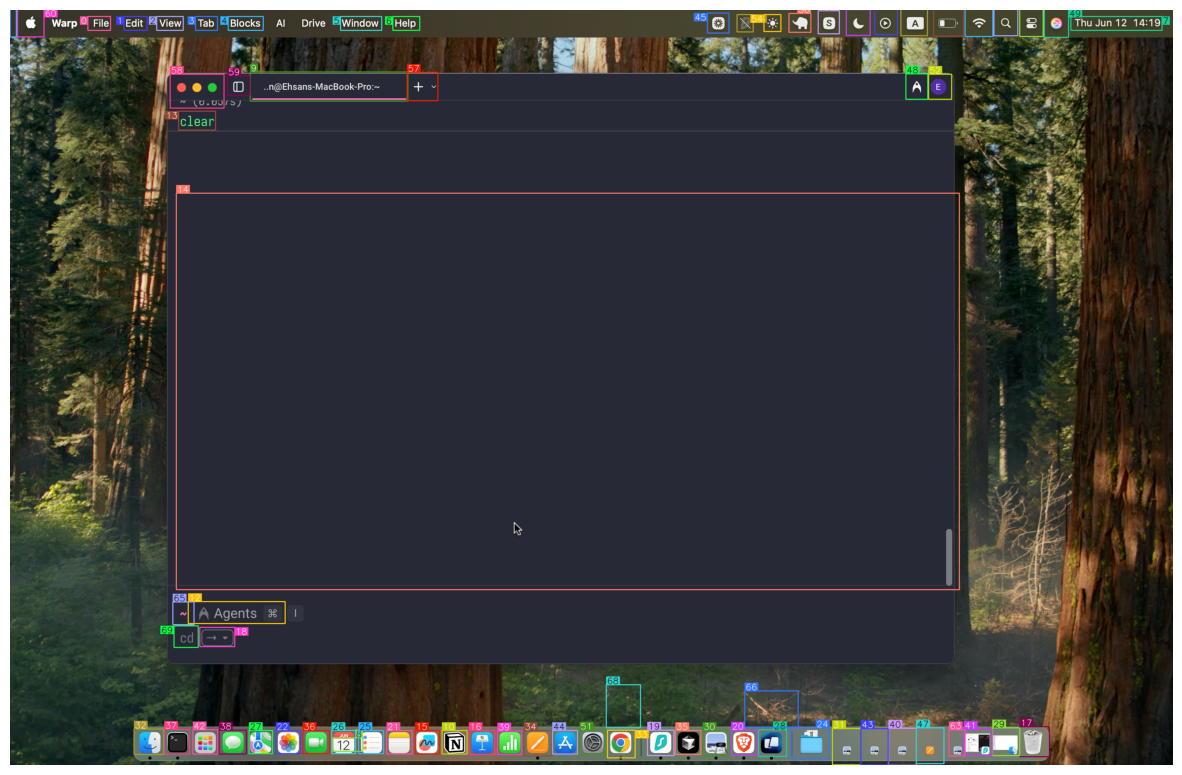

In [13]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(15,15))

image = Image.open(io.BytesIO(base64.b64decode(o1)))
plt.axis('off')

plt.imshow(image)
print(o2)


In [48]:
import pandas as pd
df = pd.DataFrame(o2)
df['ID'] = range(len(df))

df

,type,bbox,interactivity,content,source,ID
0,text,"[0.1500781625509262, 0.011121409013867378, 0.3...",False,Document 10.docx General* Last Modified: Jus...,box_ocr_content_ocr,0
1,text,"[0.034392911940813065, 0.04726598784327507, 0....",False,Home,box_ocr_content_ocr,1
2,text,"[0.22094841301441193, 0.048192769289016724, 0....",False,Mailings,box_ocr_content_ocr,2
3,text,"[0.2595101594924927, 0.05004633963108063, 0.28...",False,Review,box_ocr_content_ocr,3
4,text,"[0.31474727392196655, 0.05004633963108063, 0.3...",False,Help,box_ocr_content_ocr,4
...,...,...,...,...,...,...
123,icon,"[0.9390138983726501, 0.9358029365539551, 0.946...",True,Adding a new item or element.,box_yolo_content_yolo,123
124,icon,"[0.2776854932308197, 0.14850807189941406, 0.28...",True,Paragraph Options,box_yolo_content_yolo,124
125,icon,"[0.3195074200630188, 0.3229205012321472, 0.332...",True,a blank space.,box_yolo_content_yolo,125
126,icon,"[0.08737807720899582, 0.14849551022052765, 0.0...",True,Paragraph Options,box_yolo_content_yolo,126


In [42]:
print(label_coordinates)

{'0': [np.float32(0.15007816), np.float32(0.01112141), np.float32(0.17717561), np.float32(0.024096388)], '1': [np.float32(0.034392912), np.float32(0.047265988), np.float32(0.02084419), np.float32(0.02502317)], '2': [np.float32(0.2209484), np.float32(0.04819277), np.float32(0.033350702), np.float32(0.02502317)], '3': [np.float32(0.25951016), np.float32(0.05004634), np.float32(0.025013028), np.float32(0.021316033)], '4': [np.float32(0.31474727), np.float32(0.05004634), np.float32(0.01875977), np.float32(0.021316033)], '5': [np.float32(0.063574776), np.float32(0.051899903), np.float32(0.021886399), np.float32(0.019462468)], '6': [np.float32(0.089630015), np.float32(0.051899903), np.float32(0.02084419), np.float32(0.019462468)], '7': [np.float32(0.11672747), np.float32(0.051899903), np.float32(0.023970826), np.float32(0.019462468)], '8': [np.float32(0.14799374), np.float32(0.051899903), np.float32(0.025013028), np.float32(0.019462468)], '9': [np.float32(0.17926003), np.float32(0.051899903)